In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_dir='./train'
val_dir='./val'
test_dir='./test'

In [4]:
BATCH_SIZE=8
IMG_SIZE=(128,128)
train_ds=tf.keras.preprocessing.image_dataset_from_directory(train_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)
val_ds=tf.keras.preprocessing.image_dataset_from_directory(val_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)
test_ds=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
            shuffle=True,batch_size=BATCH_SIZE,image_size=IMG_SIZE)

Found 1489 files belonging to 3 classes.
Found 1619 files belonging to 3 classes.
Found 1082 files belonging to 3 classes.


In [5]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses']


In [6]:
img=[]
label=[]
for image_batch,label_batch in train_ds:
    img.append(image_batch)
    label.append(label_batch)
inputs=np.concatenate(img)
targets=np.concatenate(label)
print(inputs.shape)
print(targets.shape)

(1489, 128, 128, 3)
(1489,)


In [7]:
train_batches=tf.data.experimental.cardinality(train_ds)
print('Training Batch=',train_batches.numpy())

Training Batch= 187


In [8]:
IMG_HEIGHT=128
IMG_WIDTH=128
from tensorflow import keras
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, 
                                                            input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(3,"softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [12]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=10, batch_size=8, verbose=1)

Epoch 1/10
187/187 [==============================] - 41s 220ms/step - loss: 0.8605 - accuracy: 0.5789 - val_loss: 0.7446 - val_accuracy: 0.6708
Epoch 2/10
187/187 [==============================] - 28s 150ms/step - loss: 0.7081 - accuracy: 0.6931 - val_loss: 0.6535 - val_accuracy: 0.7795
Epoch 3/10
187/187 [==============================] - 27s 145ms/step - loss: 0.6090 - accuracy: 0.7448 - val_loss: 0.5624 - val_accuracy: 0.7449
Epoch 4/10
187/187 [==============================] - 28s 147ms/step - loss: 0.4776 - accuracy: 0.8180 - val_loss: 0.4318 - val_accuracy: 0.8721
Epoch 5/10
187/187 [==============================] - 28s 147ms/step - loss: 0.3716 - accuracy: 0.8556 - val_loss: 0.2790 - val_accuracy: 0.9030
Epoch 6/10
187/187 [==============================] - 27s 146ms/step - loss: 0.2688 - accuracy: 0.8966 - val_loss: 0.2203 - val_accuracy: 0.9203
Epoch 7/10
187/187 [==============================] - 27s 147ms/step - loss: 0.1921 - accuracy: 0.9281 - val_loss: 0.1867 - val_ac

In [14]:
loss, accuracy = model.evaluate(test_ds)

136/136 [==============================] - 5s 34ms/step - loss: 0.1422 - accuracy: 0.9603


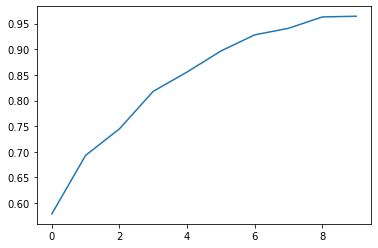

In [15]:
d=hist.history
d.keys()
plt.plot(range(10),d['accuracy'])

In [16]:
pred=model.predict(test_ds)

In [17]:
p=np.argmax(pred,axis=1)

In [18]:
img=[]
label=[]
for image_batch,label_batch in test_ds:
    img.append(image_batch)
    label.append(label_batch)
Timage=np.concatenate(img)
Tlabel=np.concatenate(label)
print(Timage.shape)
print(Tlabel.shape)

(1082, 128, 128, 3)
(1082,)


In [19]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Tlabel,p)
cm

array([[109,  58, 171],
       [ 61,  49,  94],
       [160, 115, 265]], dtype=int64)

(128, 128, 3)
(128, 128, 3)
(1, 128, 128, 3)
Prob= 0.9993339
Label= 2
class= roses


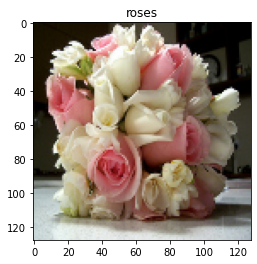

In [33]:
i=100
im=Timage[i]
L=Tlabel[i]
print(im.shape)
plt.imshow(im/255)
plt.title(class_names[L])
print(im.shape)
im1=tf.expand_dims(im,axis=0)
print(im1.shape)
P=model.predict(im1)
P
print('Prob=',np.max(P[0]))
print('Label=',np.argmax(P[0]))
print('class=',class_names[np.argmax(P[0])])

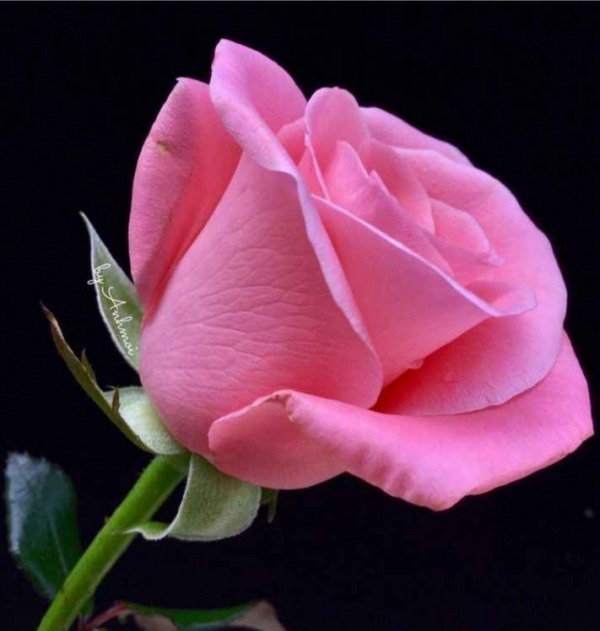

In [38]:
# Read an image from directory 
import PIL
dir='4.jpg'
PIL.Image.open(dir)


(631, 600, 3)


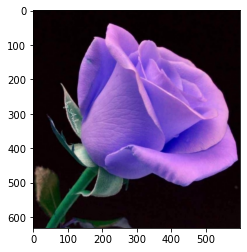

In [48]:
# Read an image from directory 
import cv2
dir='4.jpg'
img=cv2.imread(dir)
print(img.shape)
import matplotlib.pyplot as plt
plt.imshow(img)

[[[0.01568628 0.00784314 0.05098039]
  [0.01568628 0.00784314 0.05098039]
  [0.01568628 0.01176471 0.04313726]
  ...
  [0.01568628 0.00784314 0.05098039]
  [0.01568628 0.01176471 0.04313726]
  [0.01568628 0.01176471 0.03529412]]

 [[0.01176471 0.00392157 0.04705882]
  [0.01176471 0.00392157 0.04705882]
  [0.01176471 0.00784314 0.03921569]
  ...
  [0.01176471 0.00392157 0.04705882]
  [0.00392157 0.         0.03137255]
  [0.00392157 0.         0.02352941]]

 [[0.01176471 0.00392157 0.04705882]
  [0.01176471 0.00392157 0.04705882]
  [0.00784314 0.00392157 0.03529412]
  ...
  [0.01176471 0.00784314 0.03921569]
  [0.00784314 0.00392157 0.03529412]
  [0.00392157 0.         0.02352941]]

 ...

 [[0.02352941 0.01568628 0.05882353]
  [0.02352941 0.01568628 0.05882353]
  [0.02352941 0.01568628 0.05882353]
  ...
  [0.02352941 0.01568628 0.05882353]
  [0.02352941 0.01568628 0.05882353]
  [0.02352941 0.01568628 0.05882353]]

 [[0.02352941 0.01568628 0.05882353]
  [0.02352941 0.01568628 0.05882353]


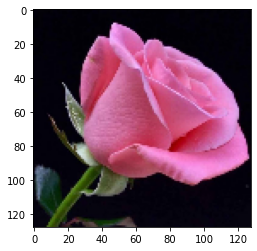

In [49]:
# keras preprocessing layer
import tensorflow as tf
dir='4.jpg'
img=tf.keras.preprocessing.image.load_img(dir,target_size=(128,128))
img=tf.keras.preprocessing.image.img_to_array(img)
img=img/255.0
print(img)
plt.imshow(img) # float[0-1]
print(img.shape)

In [50]:
im1=tf.expand_dims(img,axis=0)
print(im1.shape)
P=model.predict(im1)
P
print('Prob=',np.max(P[0]))
print('Label=',np.argmax(P[0]))
print('class=',class_names[np.argmax(P[0])])

(1, 128, 128, 3)
Prob= 0.9994924
Label= 1
class= dandelion
